In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [13]:

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target_names[iris.target]
df.to_csv('data/iris.csv', index=False)
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)

model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_shape=(4,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
2/2 [==============================] - 1s 173ms/step - loss: 1.0681 - accuracy: 0.4595 - val_loss: 1.0716 - val_accuracy: 0.2920
Epoch 2/10
2/2 [==============================] - 0s 38ms/step - loss: 0.9698 - accuracy: 0.4595 - val_loss: 1.1163 - val_accuracy: 0.2920
Epoch 3/10
2/2 [==============================] - 0s 61ms/step - loss: 0.9565 - accuracy: 0.4595 - val_loss: 1.0255 - val_accuracy: 0.2920
Epoch 4/10
2/2 [==============================] - 0s 39ms/step - loss: 0.8753 - accuracy: 0.4595 - val_loss: 0.9163 - val_accuracy: 0.3274
Epoch 5/10
2/2 [==============================] - 0s 37ms/step - loss: 0.8217 - accuracy: 0.4595 - val_loss: 0.8596 - val_accuracy: 0.5929
Epoch 6/10
2/2 [==============================] - 0s 38ms/step - loss: 0.7847 - accuracy: 0.7027 - val_loss: 0.8119 - val_accuracy: 0.7257
Epoch 7/10
2/2 [==============================] - 0s 38ms/step - loss: 0.7497 - accuracy: 0.7297 - val_loss: 0.7629 - val_accuracy: 0.6991
Epoch 8/10
2/2 [==========

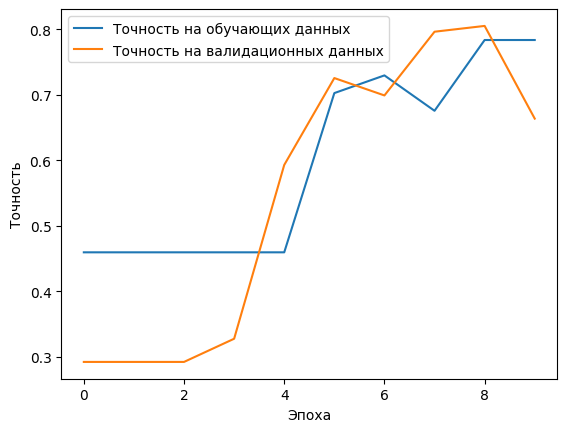

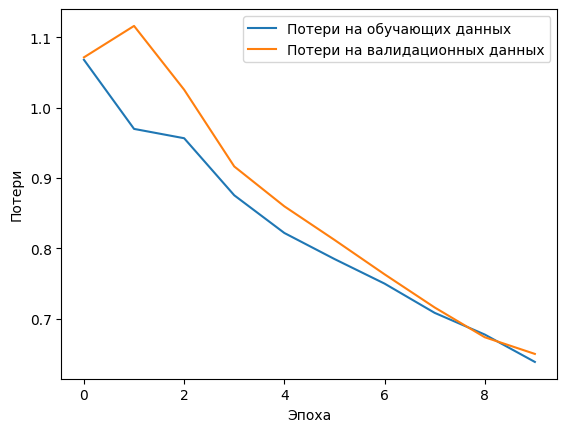

In [14]:

# Визуализация точности
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на валидационных данных')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

# Визуализация потерь
plt.plot(history.history['loss'], label='Потери на обучающих данных')
plt.plot(history.history['val_loss'], label='Потери на валидационных данных')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()



In [15]:
import visualkeras
visualkeras.layered_view(model)

In [16]:

# Сохранение модели
model.save('models/my_model3.h5')

# Сохранение метрик в файл JSON
metrics_dict = {'accuracy': history.history['accuracy'],
                'val_accuracy': history.history['val_accuracy'],
                'loss': history.history['loss'],
                'val_loss': history.history['val_loss']}

import json

with open('metrics/metrics3.json', 'w') as json_file:
    json.dump(metrics_dict, json_file)